In [3]:
using ReverseDiff
using ProgressMeter
using Base.Test
using MLDataPattern
import PyPlot
PyPlot.pygui(false)
using Plots
pyplot()

Plots.PyPlotBackend()

In [11]:
include("nets.jl")

Test Summary: | Pass  Total
feedforward   |  200    200
Test Summary: | 

Pass  Total
random shapes |  392    392
Test Summary:     | Pass  Total
compiled jacobian | 1000   1000


Nets

Progress:  75%|███████████████████████████████          |  ETA: 0:00:00

0.0011095898320115228


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00



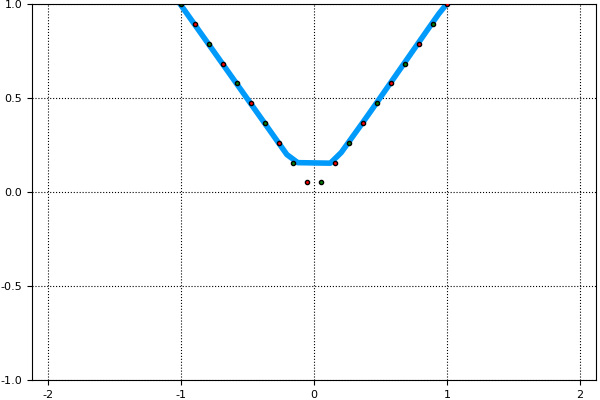

In [18]:
x = linspace(-1, 1, 20)
data = [x >= 0 ? ([x], [x 1]) : ([x], [-x -1]) for x in x]
data = vcat(data[1:2:end], data[2:2:end])
train_data, test_data = splitobs(data, 0.5)

# data = [
# begin
#     x = randn()
#     if x >= 0
#         [x], [x, 1]
#     else
#         [x], [-x, -1]
#     end
#     end for i in 1:20];


shapes = [(4, 1), (4, 4), (1, 4)]
net = Nets.Net(shapes)
params = rand(net) .- 0.5
@inferred Nets.predict_sensitivity(net, params, [0])

predict = (params, x) -> Nets.predict_sensitivity(net, params, x)
loss = (params, x, y) -> sum(abs2, y - predict(params, x))

loss(params, data[1][1], data[1][2])

@showprogress for i in 1:20
    Nets.sgd!(loss, params, train_data, 
        Nets.SGDOpts(learning_rate=0.1, learning_decay=0.95, momentum=0., batch_size=2))
end

println(mean(xy -> sum(abs2, xy[2][1] - predict(params, xy[1])[1]), test_data))
# @show mean(xy -> loss(params, xy[1], xy[2]), test_data)

xx = linspace(-2, 2)
plt = plot(xx, x -> predict(params, [x])[1], ylim=(-1, 1), legend=nothing, linewidth=4)
plot!(plt, [x[1] for (x, y) in train_data], [y[1] for (x, y) in train_data], 
line=nothing,
markershape=:circle,
markercolor=:green,
markersize=3
)
plot!(plt, [x[1] for (x, y) in test_data], [y[1] for (x, y) in test_data], 
line=nothing,
markershape=:circle,
markercolor=:red,
markersize=3
)
plt

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


0.09026929084547985



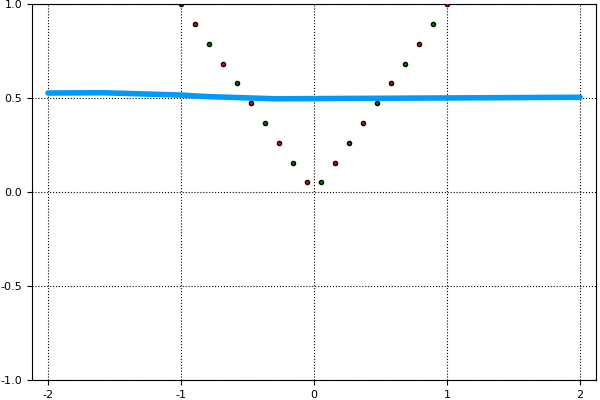

In [20]:
train_data2 = [(d[1], d[2][1:1]) for d in train_data]
test_data2 = [(d[1], d[2][1:1]) for d in test_data]

shapes = [(4, 1), (4, 4), (1, 4)]
net = Nets.Net(shapes)
params = rand(net) - 0.5
@inferred Nets.predict(net, params, [0])

predict = (params, x) -> Nets.predict(net, params, x)
loss = (params, x, y) -> sum(abs2, y - predict(params, x))

@showprogress for i in 1:20
    Nets.sgd!(loss, params, train_data2, 
        Nets.SGDOpts(learning_rate=0.1, learning_decay=0.95, momentum=0., batch_size=2))
end

println(mean(xy -> loss(params, xy[1], xy[2]), test_data2))

xx = linspace(-2, 2)
plt = plot(xx, x -> predict(params, [x])[1], ylim=(-1, 1), legend=nothing, linewidth=4)
plot!(plt, [x for (x, y) in train_data2], [y for (x, y) in train_data2], 
line=nothing,
markershape=:circle,
markercolor=:green,
markersize=3
)
plot!(plt, [x for (x, y) in test_data2], [y for (x, y) in test_data2], 
line=nothing,
markershape=:circle,
markercolor=:red,
markersize=3
)
plt